# Chocolate Scraping with Beautiful Soup

After eating chocolate bars your whole life, you've decided to go on a quest to find the greatest chocolate bar in the world.

You've found a website that has over 1700 reviews of chocolate bars from all around the world. It's linked below the text for the first task.

The data is displayed in a table, instead of in a `csv` or `json`. Thankfully, we have the power of BeautifulSoup that will help us transform this webpage into a DataFrame that we can manipulate and analyze.

The rating scale is from 1-5, as described in <a href="http://flavorsofcacao.com/review_guide.html">this review guide</a>. A `1` is "unpleasant" chocolate, while a `5` is a bar that transcends "beyond the ordinary limits".

Some questions we thought about when we found this dataset were:
 - Where are the best cocao beans grown?
 - Which countries produce the highest-rated bars?
 - What's the relationship between cocao solids percentage and rating?
 
Can we find a way to answer these questions, or uncover more questions, using BeautifulSoup and Pandas?

## Import libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Make Some Chocolate Soup

1. Explore the webpage displayed in the browser. (https://content.codecademy.com/courses/beautifulsoup/cacao/index.html) What elements could be useful to scrape here? Which elements do we _not_ want to scrape?

List of Tags to Include:

- classes for:
    - **"Company"** - company that makes the bar
    - **"Origin"** - city/province of bean origin
    - **"ReviewDate"** - year of review
    - **"CocoaPercent"** - percentage of cocao solids in the bar
    - **"CompanyLocation"** - country company is located in
    - **"Rating"** - rating from 1 (worst) to 5 (best)
    - **"BeanType"** - species of cocao bean
    - **"BroadBeanOrigin"** - country of bean origin

List of Tags to Exclude:

- classes for:
    - **"REF"** - Not sure what this is
- any formatting tags

2. Let's make a request to this site to get the raw HTML, which we can later turn into a BeautifulSoup object.

   The URL is

    ```
    https://content.codecademy.com/courses/beautifulsoup/cacao/index.html
    ```
   
   You can pass this into the `.get()` method of the `requests` module to get the HTML.

In [2]:
chocolate_scrape = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')
chocolate_content = chocolate_scrape.content

3. Create a BeautifulSoup object called `soup` to traverse this HTML.

   Use `"html.parser"` as the parser, and the content of the response you got from your request as the document.

In [4]:
soup = BeautifulSoup(chocolate_content, "html.parser")

4. If you want, print out the `soup` object to explore the HTML.

   So many table rows! You're probably very relieved that we don't have to scrape this information by hand.

In [5]:
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
</head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<table id="cacaoTable">
<tr>
<td class="Company">Company 
       

## How are ratings distributed?

5. How many terrible chocolate bars are out there? And how many earned a perfect 5? Let's make a histogram of this data.

   The first thing to do is to put all of the ratings into a list.
   
   Use a command on the `soup` object to get all of the tags that contain the ratings.

In [6]:
rating_tags = soup.find_all(attrs={'class':'Rating'})

6. Create an empty list called `ratings` to store all the ratings in.

In [7]:
ratings = []

7. Loop through the ratings tags and get the text contained in each one. Add it to the ratings list.

   As you do this, convert the rating to a float, so that the ratings list will be numerical. This should help with calculations later.

In [8]:
for tag in rating_tags[1:]:
    ratings.append(float(tag.get_text()))

8. Using Matplotlib, create a histogram of the ratings values:

    ```py
    plt.hist(ratings)
    ```

    Remember to show the plot using `plt.show()`!

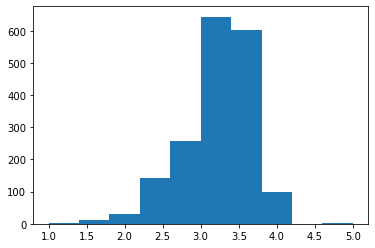

In [9]:
plt.hist(ratings)
plt.show()

## Which chocolatier makes the best chocolate?

9. We want to now find the 10 most highly rated chocolatiers. One way to do this is to make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a `groupby` to find the ones with the highest average rating.

   First, let's find all tags on the webpage that contain the company names.

In [10]:
choc_cos = soup.find_all(attrs={"class": "Company"})

10. Just like we did with ratings, we now want to make an empty list to hold company names.

In [11]:
company_names = []

11. Loop through the tags containing the company names, and add the text from each tag to the list you just created.

In [12]:
for tag in choc_cos[1:]:
    company_names.append(tag.get_text())

12. Create a DataFrame with a column "Company" corresponding to your companies list, and a column "Ratings" corresponding to your ratings list.

In [14]:
df = {"Chocolate Company": company_names, "Ratings": ratings}
co_rate_df = pd.DataFrame.from_dict(df)

13. Use `.grouby` to group your DataFrame by Company and take the average of the grouped ratings.

    Then, use the `.nlargest` command to get the 10 highest rated chocolate companies. Print them out.
    
    Look at the hint if you get stuck on this step!

In [15]:
mean_ratings = co_rate_df.groupby("Chocolate Company").Ratings.mean()
ten_best = mean_ratings.nlargest(10)
print(ten_best)

Chocolate Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Ratings, dtype: float64


## Is more cacao better?

14. We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacoa to be better than those with lower levels of cacoa.

    It looks like the cocoa percentages are in the table under the Cocoa Percent column (note we are looking at cocoa not cocao!)
    
    Using the same methods you used in the last couple of tasks, create a list that contains all of the cocoa percentages. Store each percent as a float, after stripping off the `%` character.

In [16]:
cocoa_percent_tags = soup.find_all(attrs={"class": "CocoaPercent"})
cocoa_percent = []
for tag in cocoa_percent_tags[1:]:
    cocoa_percent.append(float(tag.get_text().strip('%')))

15. Add the cocoa percentages as a column called `"CocoaPercentage"` in the DataFrame that has companies and ratings in it.

In [17]:
df["CocoaPercentage"] = cocoa_percent
co_rate_cocoa_df = pd.DataFrame.from_dict(df)

16. Make a scatterplot of ratings (`your_df.Rating`)(y-axis) vs percentage of cocoa (`your_df.CocoaPercentage`)(x-axis).

    You can do this in Matplotlib with these commands:
    
    ```py
    plt.scatter(df.CocoaPercentage, df.Rating)
    plt.show()
    ```

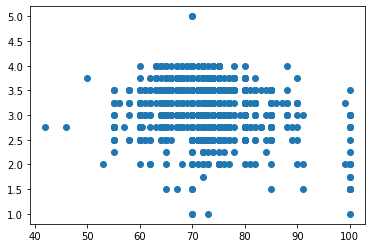

In [22]:
plt.scatter(co_rate_cocoa_df.CocoaPercentage, co_rate_cocoa_df.Ratings)
plt.show()

17. Is there any correlation here? We can use some numpy commands to draw a line of best-fit over the scatterplot.

    Copy this code and paste it after you create the scatterplot, but before you call `.show()`:
    
```py
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r-")
```

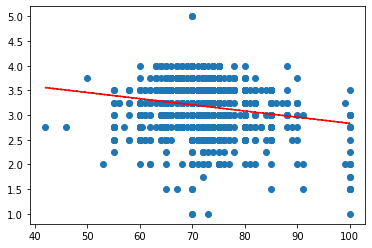

In [23]:
plt.scatter(co_rate_cocoa_df.CocoaPercentage, co_rate_cocoa_df.Ratings)
z = np.polyfit(co_rate_cocoa_df.CocoaPercentage, co_rate_cocoa_df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(co_rate_cocoa_df.CocoaPercentage, line_function(co_rate_cocoa_df.CocoaPercentage), "r--")
plt.show()

## Explore!

18. We have explored a couple of the questions about chocolate that inspired us when we looked at this chocolate table.

    What other kinds of questions can you answer here? Try to use a combination of BeautifulSoup and Pandas to explore some more.
    
    For inspiration: Where are the best cocoa beans grown? Which countries produce the highest-rated bars?

## Which city/province grows the best beans?

In [31]:
# where are the best cocoa beans grown?
city_bean = soup.find_all(attrs={"class": "Origin"})

bean_origin = []

for tag in city_bean[1:]:
    bean_origin.append(tag.get_text())
    
df = {"Name of bar/Area of Origin": bean_origin, "Ratings": ratings}
bean_df = pd.DataFrame.from_dict(df)    

mean_ratings = bean_df.groupby("Name of bar/Area of Origin").Ratings.mean()
ten_best = mean_ratings.nlargest(10)
print(ten_best)

Name of bar/Area of Origin
Toscano Black                                  4.166667
ABOCFA Coop                                    4.000000
Alto Beni, Cru Savage                          4.000000
Asante                                         4.000000
Bali, Sukrama Bros. Farm, Melaya, 62hr C       4.000000
Bellavista Coop, #225, LR, MC, CG Exclusive    4.000000
Cabosse                                        4.000000
Carenero Superior, Urrutia, Barlovento         4.000000
Chuao, #217, DR, MC                            4.000000
Claudio Corallo w/ nibs                        4.000000
Name: Ratings, dtype: float64


## Which countries produce the highest-rated bars?

In [32]:
# which countries produce the highest-rated bars?
country_bean = soup.find_all(attrs={"class": "BroadBeanOrigin"})

bean_origin = []

for tag in country_bean[1:]:
    bean_origin.append(tag.get_text())
    
df = {"Country of Origin": bean_origin, "Ratings": ratings}
bean_df = pd.DataFrame.from_dict(df)    

mean_ratings = bean_df.groupby("Country of Origin").Ratings.mean()
ten_best = mean_ratings.nlargest(10)
print(ten_best)

Country of Origin
Dom. Rep., Madagascar           4.00
Gre., PNG, Haw., Haiti, Mad     4.00
Guat., D.R., Peru, Mad., PNG    4.00
Peru, Dom. Rep                  4.00
Ven, Bolivia, D.R.              4.00
Venezuela, Java                 4.00
DR, Ecuador, Peru               3.75
Dominican Rep., Bali            3.75
PNG, Vanuatu, Mad               3.75
Peru, Belize                    3.75
Name: Ratings, dtype: float64


## Which bean produces the highest-rated bars?

In [33]:
bean_species = soup.find_all(attrs={"class": "BeanType"})

bean_type = []

for tag in bean_species[1:]:
    bean_type.append(tag.get_text())
    
df = {"Bean Type": bean_type, "Ratings": ratings}
bean_df = pd.DataFrame.from_dict(df)    

mean_ratings = bean_df.groupby("Bean Type").Ratings.mean()
ten_best = mean_ratings.nlargest(10)
print(ten_best)

# how to get rid of null values in <td> tags??

Bean Type
                            4.000
Criollo (Ocumare 67)        4.000
Criollo (Wild)              4.000
Trinitario (85% Criollo)    3.875
Amazon mix                  3.750
Blend-Forastero,Criollo     3.750
Criollo (Ocumare 77)        3.750
Forastero (Amelonado)       3.750
Trinitario, Nacional        3.750
Trinitario, TCGA            3.750
Name: Ratings, dtype: float64
